<b> Please Note : This is a Follow-Up notebook and only cover reference notes

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Titanic dataset.csv")

In [3]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

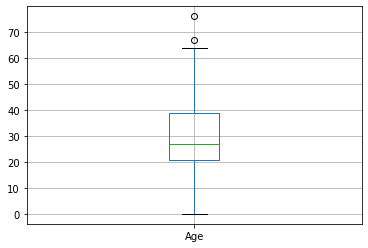

In [4]:
data.boxplot(column = "Age")

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

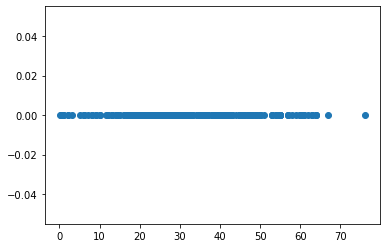

In [6]:
plt.scatter(data.Age,np.zeros_like(data.Age))

# Handling Outliers
<ul>
<li><b>Trimming :</b> Simply removing the outliers from our dataset.
<li><b>Imputing :</b> We treat outliers as missing data, and we apply missing data imputation techniques.
<li><b>Discretization :</b> We place outliers in edge bins with higher or lower values of the distribution.
    <li><b>Censoring :</b> Capping the variable distribution at the maximum and minimum values.

# Trimming

Trimming (or truncation) merely means removing outliers from the dataset; what we need here is just to decide on a metric to determine outliers.


In [7]:
for variable in data.columns:
    #calculate the IQR
    IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
    
    #calculate the boundries
    lower = data['Age'].quantile(0.25) - (IQR * 1.5)
    #print(lower)
    upper = data['Age'].quantile(0.75) + (IQR * 1.5)
   # print(upper)
    # find the outliers
    outliers = np.where(data['Age'] > upper, True, np.where(data['Age'] < lower, True, False))
    
    # remove outliers from data.
    data = data.loc[~(outliers) ]  

<AxesSubplot:>

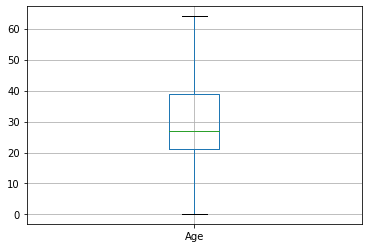

In [10]:
data.boxplot(column = "Age")

# Censoring
Censoring (or capping) means setting the maximum and/or the minimum of the distribution at an arbitrary value.
In other words, values bigger or smaller than the arbitrarily chosen value are replaced by this value.

When doing capping, remember that:

It does not remove data.

It distorts the distributions of the variables.

The numbers at which to cap the distribution can be determined using various methods, which we’ll cover below

# Arbitrarily
You can choose values to replace outliers arbitrarily; this can be based on the requirements of your use case. Here’s a code snippet:

<AxesSubplot:>

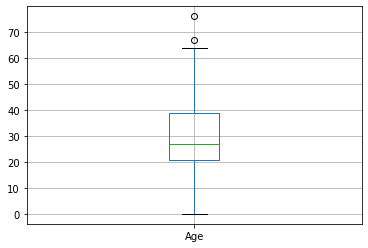

In [14]:
data = pd.read_csv("Titanic dataset.csv")
data.boxplot('Age')

In [15]:

for variable in data.columns:

    # create boundries (age for example)
    lower = 10
    upper = 60
    
    # replacing the outliers
    data['Age'] = np.where(data['Age'] > upper, upper, np.where(data['Age'] < lower, lower, data['Age']))


<AxesSubplot:>

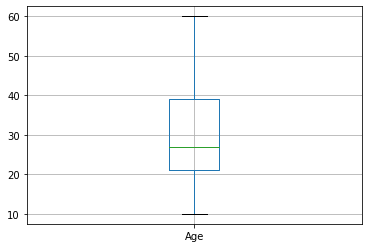

In [16]:
data.boxplot('Age')

# Inter-quantal range proximity rule
In this rule, the boundaries are determined using IQR proximity rules:

In [ ]:
data = pd.read_csv("Titanic dataset.csv")
data.boxplot('Age')

In [17]:
for variable in data.columns:
    #calculate the IQR
    IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
    
    #calculate the boundries
    lower = data['Age'].quantile(0.25) - (IQR * 1.5)
    upper = data['Age'].quantile(0.75) + (IQR * 1.5)
    
    # replacing the outliers
    data['Age'] = np.where(data['Age'] > upper, upper, np.where(data['Age'] < lower, lower, data['Age']))


In [18]:
lower

-6.0

In [19]:
upper

66.0

<AxesSubplot:>

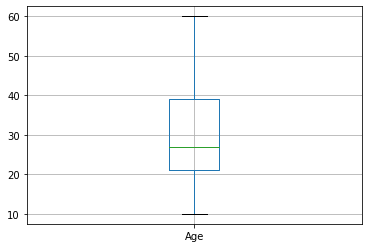

In [20]:
data.boxplot('Age')

# Gaussian approximation
Another code snippet that sets the boundaries with values according to the mean and standard deviation:

<AxesSubplot:>

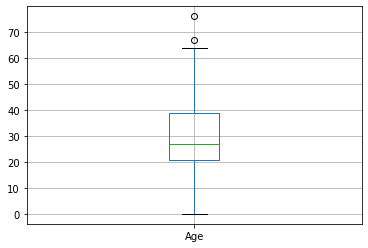

In [21]:
data = pd.read_csv("Titanic dataset.csv")
data.boxplot('Age')

In [31]:
for variable in data.columns:
    
    #calculate the boundries
    lower = data['Age'].mean() - 2 * data['Age'].std()
    upper = data['Age'].mean() + 2 * data['Age'].std()
    
    # replacing the outliers
    data['Age'] = np.where(data['Age'] > upper, upper, np.where(data['Age'] < lower, lower, data['Age']))


# Using quantiles
In the following code snippet, the boundaries are determined using the quantiles, through which you can specify any percentage you want:

<AxesSubplot:>

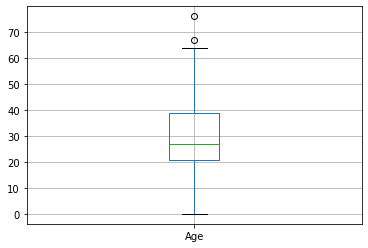

In [33]:
data = pd.read_csv("Titanic dataset.csv")
data.boxplot('Age')

In [34]:
for variable in data.columns:
    
    #calculate the boundries
    lower = data['Age'].quantile(0.10)
    upper = data['Age'].quantile(0.90)
    
    # replacing the outliers
    data['Age'] = np.where(data['Age'] > upper, upper, np.where(data['Age'] < lower, lower, data['Age']))


In [35]:
lower

16.686189403910006

In [36]:
upper

50.0

In [ ]:
data.boxplot('Age')

# Imputing
Another technique used to handle outliers is to treat them as missing data. We have a range of methods that we can use to replace or impute outliers.

# Transformation
We can also apply some mathematical transformations, such as log transformation. To handle the outliers, there are a range of transformation techniques .